In [1]:
import pandas as pd
import numpy as np

In [2]:
bike_feb = pd.read_csv('bike/df_feb_1.csv')
bike_mar = pd.read_csv('bike/df_mar_1.csv')
bike_apr = pd.read_csv('bike/df_apr_1.csv')
bike_may = pd.read_csv('bike/df_may_1.csv')

In [3]:
print(bike_feb.shape)
print(bike_mar.shape)
print(bike_apr.shape)
print(bike_may.shape)


(838972, 14)
(939321, 14)
(920625, 14)
(951988, 14)


In [4]:
# concate all the dataframes
bike = pd.concat([bike_mar, bike_apr, bike_may], axis=0)
print(bike.shape)


(2811934, 14)


In [5]:
display(bike.head())

,sno,station_x,district,date_x,tot,sbi,dock,act,dayofweek,is_weekday,month,lat,lng,ar
0,500101001,捷運科技大樓站,大安區,2023-03-01 00:00:00,28,3,25,1,3,1,mar,25.02605,121.54360,復興南路二段235號前
1,500101002,復興南路二段273號前,大安區,2023-03-01 00:00:00,21,2,19,1,3,1,mar,25.02565,121.54357,復興南路二段273號西側
2,500101003,國北教大實小東側門,大安區,2023-03-01 00:00:00,16,7,9,1,3,1,mar,25.02429,121.54124,和平東路二段96巷7號
3,500101004,和平公園東側,大安區,2023-03-01 00:00:00,11,6,5,1,3,1,mar,25.02351,121.54282,和平東路二段118巷33號
4,500101005,辛亥復興路口西北側,大安區,2023-03-01 00:00:00,16,1,15,1,3,1,mar,25.02153,121.54299,復興南路二段368號


In [6]:
# drop the row contains 'xx','xy' 
bike = bike[~bike['station_x'].isin(['機場捷運台北車站(6號出口)','延平北平路口','星雲金湖街口','華聲公園','萬華國中','銘傳大學'
,'忠孝東路六段225巷口','南港車站(忠孝東路)','九華公園','仁德公園','劍潭社區','民榮公園','中山福國路口'])]  
print(bike.shape) 

(2788201, 14)


In [7]:
print(bike['sno'].value_counts())
drop_list_under2880 = bike['sno'].value_counts()[bike['sno'].value_counts() < 2208].index.tolist()
print(drop_list_under2880)

sno
500101001    2208
500109046    2208
500109053    2208
500109052    2208
500109051    2208
             ... 
500108160    1215
500101223    1047
500101224     916
500113069     373
500101225      39
Name: count, Length: 1272, dtype: int64
[500108145, 500108148, 500108150, 500108156, 500108158, 500108159, 500108144, 500108162, 500108161, 500106117, 500106119, 500106120, 500106118, 500108141, 500108143, 500108146, 500108147, 500108153, 500108157, 500108152, 500108164, 500108154, 500108151, 500101222, 500101221, 500107138, 500110080, 500107139, 500108160, 500101223, 500101224, 500113069, 500101225]


In [8]:
#drop the row contains the station that has less than 2880 data
bike = bike[~bike['sno'].isin(drop_list_under2880)]
print(bike.shape)
print(bike['sno'].value_counts())

(2735712, 14)
sno
500101001    2208
500109046    2208
500109053    2208
500109052    2208
500109051    2208
             ... 
500106004    2208
500106003    2208
500106002    2208
500106001    2208
500119091    2208
Name: count, Length: 1239, dtype: int64


In [9]:
# get the columns that are needed
bike_tot_sbi = bike[['sno','sbi', 'tot','date_x']]
print(bike_tot_sbi.shape)

# calculate the ration of sbi/tot in ration column
bike_tot_sbi['ratio'] = bike_tot_sbi['sbi']/bike_tot_sbi['tot']
print(bike_tot_sbi.shape)


(2735712, 4)
(2735712, 5)


/var/folders/t4/8sqp7_5n2l7d7tdc45y92xwh0000gn/T/ipykernel_16596/1682427441.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_tot_sbi['ratio'] = bike_tot_sbi['sbi']/bike_tot_sbi['tot']


In [10]:
print(bike_tot_sbi['sno'].value_counts())

sno
500101001    2208
500109046    2208
500109053    2208
500109052    2208
500109051    2208
             ... 
500106004    2208
500106003    2208
500106002    2208
500106001    2208
500119091    2208
Name: count, Length: 1239, dtype: int64


In [11]:
#make the same 'sno' in the same row

bike_pivot = bike_tot_sbi.pivot_table(index=['sno'], columns='date_x', values='ratio')
print(bike_pivot.shape)
# print(bike_pivot.head())

(1239, 2207)


In [12]:
# draw the line chart 
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
# draw distribution plot

plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [14]:
#check if there is any value over 1 or under 0
print(bike_pivot[bike_pivot > 1].value_counts())
print(bike_pivot[bike_pivot < 0].value_counts())

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[0.16300550409489653, 0.10828879272172602, 0.07141836382275525, 0.06428623131713503, 0.061526200536234324, 0.043712211594345476, 0.036055442199140364, 0.0330308529907213, 0.025633396786780813]


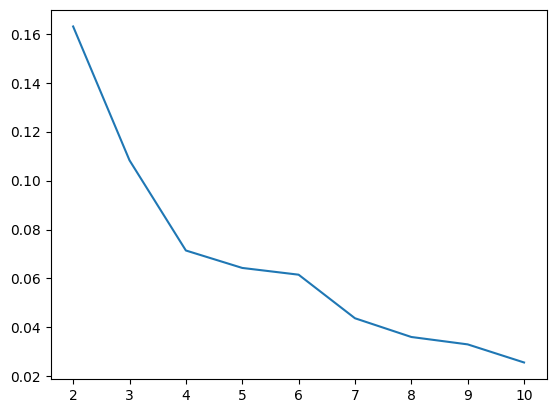

In [15]:
# clusterinnf by kmeans and Silhouette Coefficient
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# create a list to store the silhouette score
silhouette_avgs = []
# set the range of k
ks = range(2, 11)
for k in ks:
    kmeans_fit = KMeans(n_clusters = k).fit(bike_pivot)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = silhouette_score(bike_pivot, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

print(silhouette_avgs)

# plot the line chart of silhouette score
plt.plot(ks, silhouette_avgs)
plt.show()

In [16]:
# PCA the pivot table
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #, random_state=42, svd_solver='full', whiten=True
pca.fit(bike_pivot)
bike_pca = pca.transform(bike_pivot)
print(bike_pca.shape)

(1239, 2)


In [17]:
# 可解釋變異量
print(pca.explained_variance_ratio_)

[0.25217157 0.07589537]


[[0.02734626 0.02830859 0.02800339 ... 0.01995361 0.02323533 0.02741246]
 [0.01846469 0.01716799 0.01487615 ... 0.00156955 0.00380651 0.00751379]]
(2, 2207)
(2, 2207)
date_x  2023-03-01 00:00:00  2023-03-01 01:00:00  2023-03-01 02:00:00  \
0                  0.027346             0.028309             0.028003   
1                  0.018465             0.017168             0.014876   

date_x  2023-03-01 03:00:00  2023-03-01 04:00:00  2023-03-01 05:00:00  \
0                  0.027794             0.027062             0.026271   
1                  0.012939             0.010903             0.008803   

date_x  2023-03-01 06:00:00  2023-03-01 07:00:00  2023-03-01 08:00:00  \
0                  0.023927             0.011604            -0.009015   
1                  0.006854             0.007033             0.017871   

date_x  2023-03-01 09:00:00  ...  2023-05-31 14:00:00  2023-05-31 15:00:00  \
0                 -0.021315  ...            -0.010428            -0.010733   
1                

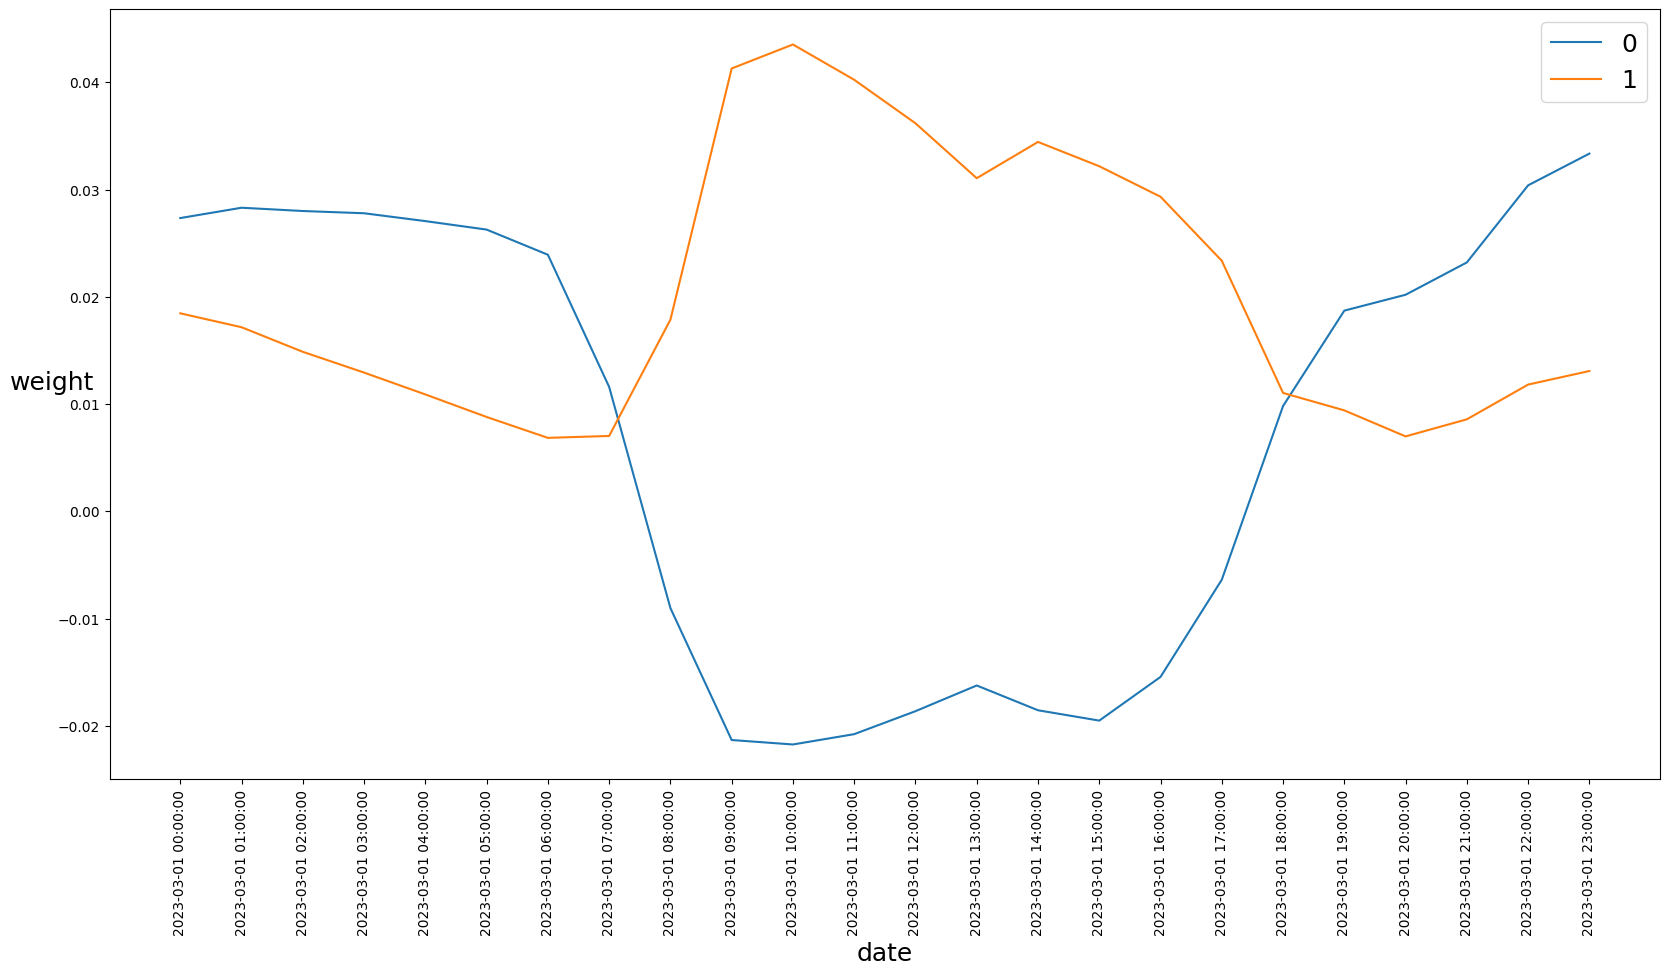

In [18]:
# show the weight of each feature
print(pca.components_)
print(pca.components_.shape)

#mapping pca_componets with the original coloumn name
pca_coloumn = pd.DataFrame(pca.components_, columns=bike_pivot.columns)
print(pca_coloumn.shape)
print(pca_coloumn.head())

#get part coloumn of the original data
pca_coloumn_sample = pca_coloumn.iloc[:,0:24]

#draw the line chart of pca_coloumn
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.plot(pca_coloumn_sample.T)
plt.xlabel('date', fontsize=18, rotation = 0)
plt.ylabel('weight', fontsize=18, rotation = 0)
#line chart name
plt.legend(pca_coloumn_sample.index, loc='upper right', fontsize=18)

plt.show()

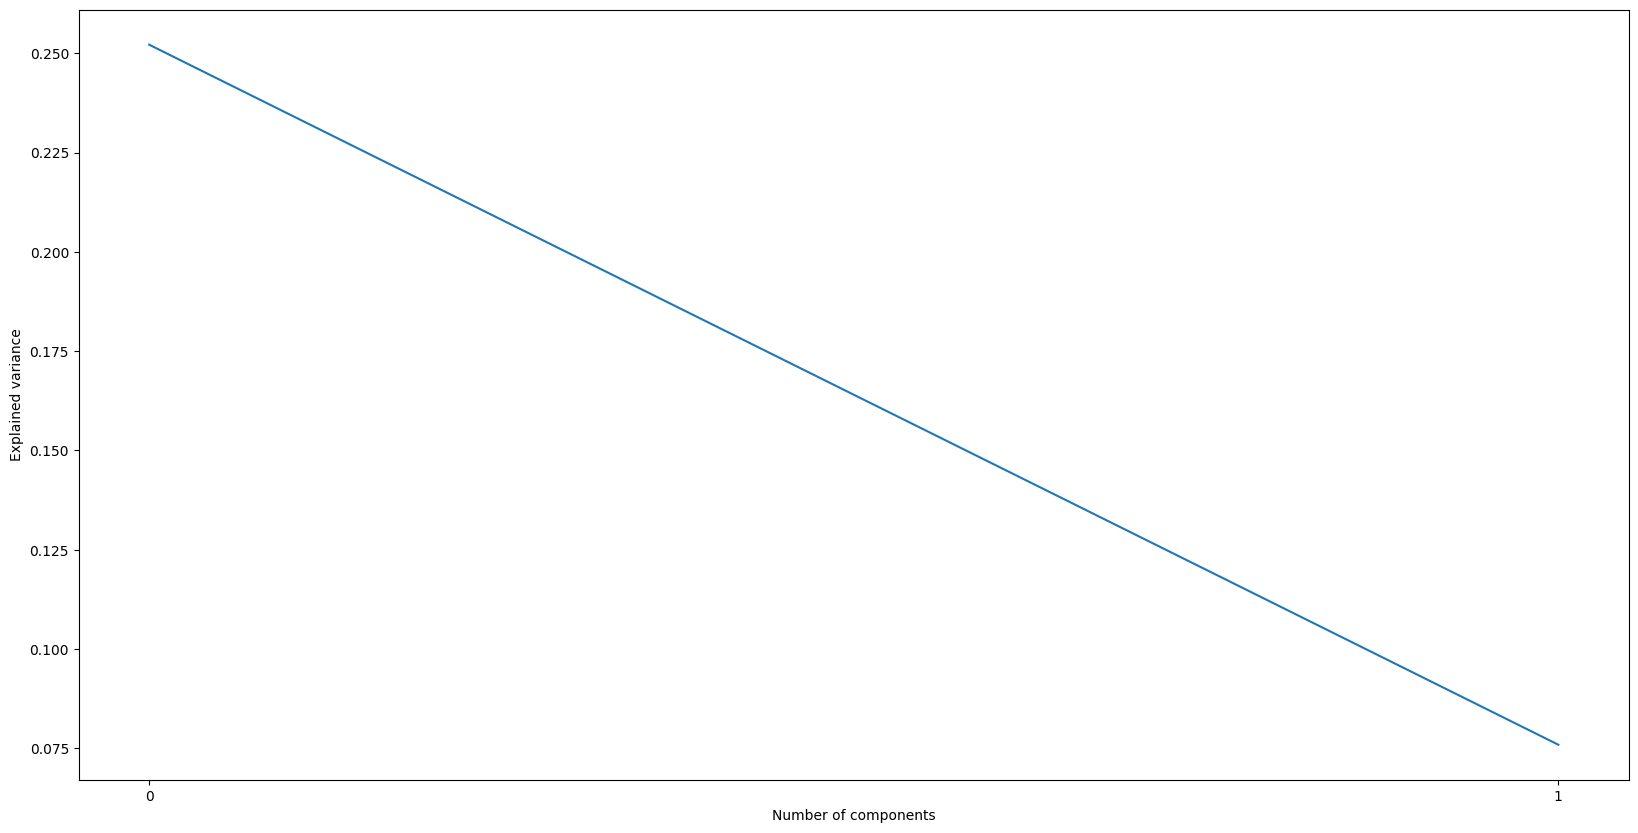

In [19]:
# screen plot
plt.figure(figsize=(20,10))
plt.plot(pca.explained_variance_ratio_)
plt.xticks(np.arange(0, 2, 1))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[0.4781185587537253, 0.44745831465487035, 0.3749948620590764, 0.39175512020697045, 0.3760769988904848, 0.35173394091428745, 0.3548340498769178, 0.35458424290687673, 0.35088330811671287]


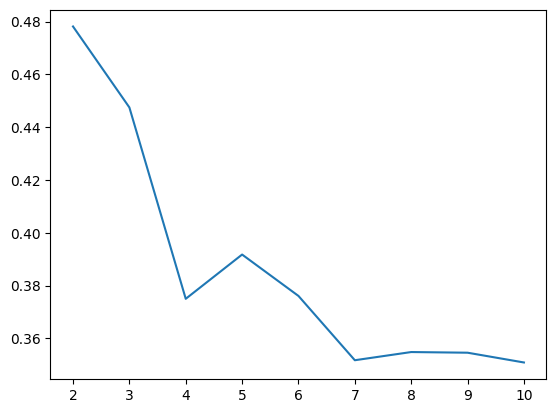

In [20]:
# clusterinnf by kmeans and Silhouette Coefficient
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# create a list to store the silhouette score
silhouette_avgs = []
# set the range of k
ks = range(2, 11)
for k in ks:
    kmeans_fit = KMeans(n_clusters = k).fit(bike_pca)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = silhouette_score(bike_pca, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

print(silhouette_avgs)

# plot the line chart of silhouette score
plt.plot(ks, silhouette_avgs)
plt.show()

In [21]:
# T-sne the pivot table
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
bike_tsne = tsne.fit_transform(bike_pivot)
print(bike_tsne.shape)


(1239, 2)


In [22]:
# 可解釋變異量
print(tsne.kl_divergence_)
print(tsne.n_iter_)
print(tsne.kl_divergence_ / tsne.n_iter_)
print(tsne.get_params(deep=True))

1.6483473777770996
999
0.0016499973751522518
{'angle': 0.5, 'early_exaggeration': 12.0, 'init': 'pca', 'learning_rate': 'auto', 'method': 'barnes_hut', 'metric': 'euclidean', 'metric_params': None, 'min_grad_norm': 1e-07, 'n_components': 2, 'n_iter': 1000, 'n_iter_without_progress': 300, 'n_jobs': None, 'perplexity': 30.0, 'random_state': None, 'verbose': 0}


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[0.56756663, 0.48523796, 0.4095932, 0.4233067, 0.4077724, 0.4037655, 0.38625616, 0.37983137, 0.36600634]


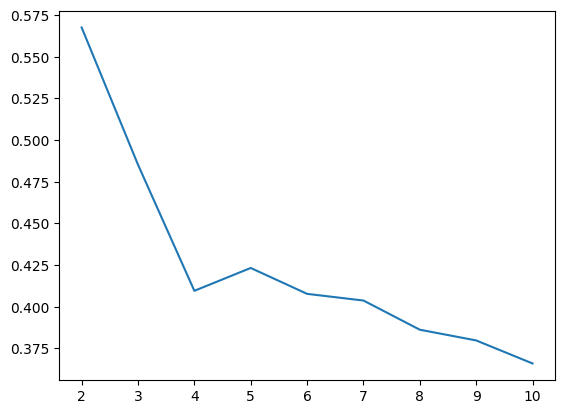

In [23]:
# clusterinnf by kmeans and Silhouette Coefficient
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# create a list to store the silhouette score
silhouette_avgs = []
# set the range of k
ks = range(2, 11)
for k in ks:
    kmeans_fit = KMeans(n_clusters = k).fit(bike_tsne)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = silhouette_score(bike_tsne, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

print(silhouette_avgs)

# plot the line chart of silhouette score
plt.plot(ks, silhouette_avgs)
plt.show()

[1 1 0 ... 1 1 1]
(1239,)


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


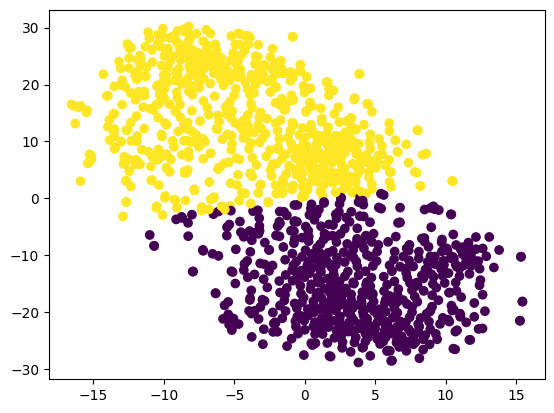

In [24]:
#use the best k to cluster
kmeans_fit = KMeans(n_clusters = 2).fit(bike_tsne)
cluster_labels = kmeans_fit.labels_
print(cluster_labels)
print(cluster_labels.shape)

#draw the scatter plot
plt.scatter(bike_tsne[:,0], bike_tsne[:,1], c=cluster_labels)
plt.show()


In [25]:
# add labels to the pivot table
bike_labeled = bike_pivot.copy()
bike_labeled['label'] = cluster_labels
print(bike_labeled.shape)
display(bike_labeled.head())




# bike_labeled.to_csv('bike_remainingratio_labeled.csv', index=False)

(1239, 2208)


date_x,2023-03-01 00:00:00,2023-03-01 01:00:00,2023-03-01 02:00:00,2023-03-01 03:00:00,2023-03-01 04:00:00,2023-03-01 05:00:00,2023-03-01 06:00:00,2023-03-01 07:00:00,2023-03-01 08:00:00,2023-03-01 09:00:00,...,2023-05-31 15:00:00,2023-05-31 16:00:00,2023-05-31 17:00:00,2023-05-31 18:00:00,2023-05-31 19:00:00,2023-05-31 20:00:00,2023-05-31 21:00:00,2023-05-31 22:00:00,2023-05-31 23:00:00,label
sno,,,,,,,,,,,,,,,,,,,,,
500101001,0.107143,0.107143,0.178571,0.178571,0.178571,0.178571,0.285714,0.178571,0.035714,0.035714,...,0.178571,0.107143,0.178571,0.928571,0.142857,0.250000,0.178571,0.142857,0.142857,1
500101002,0.095238,0.095238,0.095238,0.095238,0.095238,0.666667,0.619048,0.619048,0.095238,0.047619,...,0.000000,0.000000,0.095238,0.428571,0.000000,0.142857,0.285714,0.047619,0.095238,1
500101003,0.437500,0.500000,0.562500,0.562500,0.562500,0.562500,0.562500,0.812500,0.812500,0.250000,...,0.125000,0.312500,0.062500,0.250000,0.062500,0.000000,0.000000,0.062500,0.062500,0
500101004,0.545455,0.636364,0.727273,0.727273,0.727273,0.727273,0.727273,0.363636,0.090909,0.454545,...,0.545455,0.363636,0.909091,0.545455,0.818182,0.909091,0.636364,0.818182,0.909091,0
500101005,0.062500,0.187500,0.312500,0.312500,0.312500,0.250000,0.312500,0.375000,0.687500,0.812500,...,0.062500,0.437500,0.062500,0.062500,0.000000,0.187500,0.000000,0.062500,0.125000,1


In [26]:
# group by label
bike_grouped_meanratio = bike_labeled.groupby('label').mean()
print(bike_grouped_meanratio.shape)
display(bike_grouped_meanratio.head())

(2, 2207)


date_x,2023-03-01 00:00:00,2023-03-01 01:00:00,2023-03-01 02:00:00,2023-03-01 03:00:00,2023-03-01 04:00:00,2023-03-01 05:00:00,2023-03-01 06:00:00,2023-03-01 07:00:00,2023-03-01 08:00:00,2023-03-01 09:00:00,...,2023-05-31 14:00:00,2023-05-31 15:00:00,2023-05-31 16:00:00,2023-05-31 17:00:00,2023-05-31 18:00:00,2023-05-31 19:00:00,2023-05-31 20:00:00,2023-05-31 21:00:00,2023-05-31 22:00:00,2023-05-31 23:00:00
label,,,,,,,,,,,,,,,,,,,,,
0,0.553986,0.565473,0.573001,0.574424,0.574899,0.571886,0.557053,0.463199,0.314966,0.232774,...,0.336571,0.336100,0.331547,0.367979,0.396026,0.440930,0.474135,0.451460,0.463823,0.512790
1,0.252968,0.256714,0.267954,0.280877,0.295430,0.301883,0.311185,0.348711,0.396110,0.420852,...,0.405879,0.403769,0.379584,0.317115,0.227394,0.188423,0.235260,0.233817,0.202397,0.202325


In [27]:
# mean ratio according to the date


In [36]:
#get first 168 coloumns from bike_grouped_meanratio
bike_grouped_meanratio_sample = bike_grouped_meanratio.iloc[:,0:168]
print(bike_grouped_meanratio_sample.shape)

(2, 168)


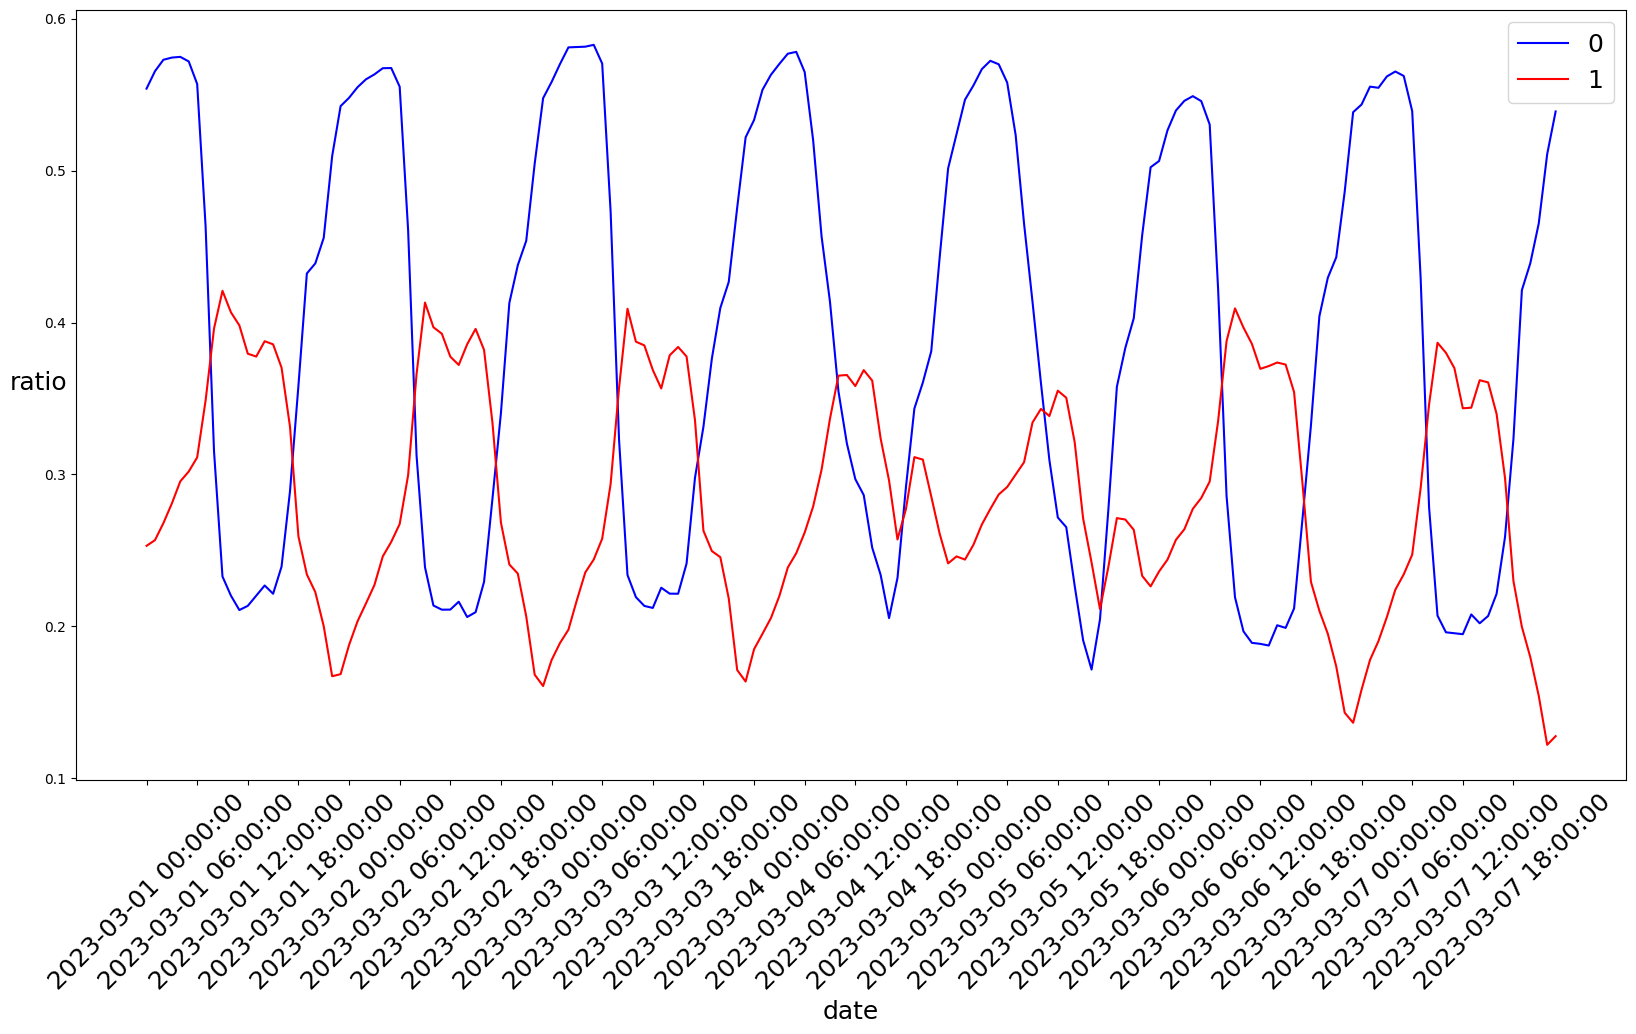

In [44]:
# draw the line chart of each label
plt.figure(figsize=(20,10))
plt.xticks(range(0, 168, 6), fontsize=18, rotation= 45)
plt.plot(bike_grouped_meanratio_sample.T)
plt.xlabel('date', fontsize=18, rotation = 0)
plt.ylabel('ratio', fontsize=18, rotation = 0)
# set label color red and blue
plt.gca().get_lines()[0].set_color("blue")
plt.gca().get_lines()[1].set_color("red")
plt.legend(bike_grouped_meanratio_sample.index, loc='upper right', fontsize=18)
plt.show()


In [51]:
# count the value smaller than 0.1 in each row
bike_labeled['count_low'] = bike_labeled.apply(lambda x: x[x < 0.1].count(), axis=1)
print(bike_labeled.shape)
display(bike_labeled.head())

# get the ration of the value smaller than 0.1 in each row
bike_labeled['ratio_low'] = bike_labeled['count_low']/2208
print(bike_labeled.shape)
display(bike_labeled.head())

(1239, 2209)


date_x,2023-03-01 00:00:00,2023-03-01 01:00:00,2023-03-01 02:00:00,2023-03-01 03:00:00,2023-03-01 04:00:00,2023-03-01 05:00:00,2023-03-01 06:00:00,2023-03-01 07:00:00,2023-03-01 08:00:00,2023-03-01 09:00:00,...,2023-05-31 16:00:00,2023-05-31 17:00:00,2023-05-31 18:00:00,2023-05-31 19:00:00,2023-05-31 20:00:00,2023-05-31 21:00:00,2023-05-31 22:00:00,2023-05-31 23:00:00,label,count_low
sno,,,,,,,,,,,,,,,,,,,,,
500101001,0.107143,0.107143,0.178571,0.178571,0.178571,0.178571,0.285714,0.178571,0.035714,0.035714,...,0.107143,0.178571,0.928571,0.142857,0.250000,0.178571,0.142857,0.142857,0,891
500101002,0.095238,0.095238,0.095238,0.095238,0.095238,0.666667,0.619048,0.619048,0.095238,0.047619,...,0.000000,0.095238,0.428571,0.000000,0.142857,0.285714,0.047619,0.095238,0,1158
500101003,0.437500,0.500000,0.562500,0.562500,0.562500,0.562500,0.562500,0.812500,0.812500,0.250000,...,0.312500,0.062500,0.250000,0.062500,0.000000,0.000000,0.062500,0.062500,1,611
500101004,0.545455,0.636364,0.727273,0.727273,0.727273,0.727273,0.727273,0.363636,0.090909,0.454545,...,0.363636,0.909091,0.545455,0.818182,0.909091,0.636364,0.818182,0.909091,1,781
500101005,0.062500,0.187500,0.312500,0.312500,0.312500,0.250000,0.312500,0.375000,0.687500,0.812500,...,0.437500,0.062500,0.062500,0.000000,0.187500,0.000000,0.062500,0.125000,0,888


(1239, 2210)


date_x,2023-03-01 00:00:00,2023-03-01 01:00:00,2023-03-01 02:00:00,2023-03-01 03:00:00,2023-03-01 04:00:00,2023-03-01 05:00:00,2023-03-01 06:00:00,2023-03-01 07:00:00,2023-03-01 08:00:00,2023-03-01 09:00:00,...,2023-05-31 17:00:00,2023-05-31 18:00:00,2023-05-31 19:00:00,2023-05-31 20:00:00,2023-05-31 21:00:00,2023-05-31 22:00:00,2023-05-31 23:00:00,label,count_low,ratio_low
sno,,,,,,,,,,,,,,,,,,,,,
500101001,0.107143,0.107143,0.178571,0.178571,0.178571,0.178571,0.285714,0.178571,0.035714,0.035714,...,0.178571,0.928571,0.142857,0.250000,0.178571,0.142857,0.142857,0,891,0.403533
500101002,0.095238,0.095238,0.095238,0.095238,0.095238,0.666667,0.619048,0.619048,0.095238,0.047619,...,0.095238,0.428571,0.000000,0.142857,0.285714,0.047619,0.095238,0,1158,0.524457
500101003,0.437500,0.500000,0.562500,0.562500,0.562500,0.562500,0.562500,0.812500,0.812500,0.250000,...,0.062500,0.250000,0.062500,0.000000,0.000000,0.062500,0.062500,1,611,0.276721
500101004,0.545455,0.636364,0.727273,0.727273,0.727273,0.727273,0.727273,0.363636,0.090909,0.454545,...,0.909091,0.545455,0.818182,0.909091,0.636364,0.818182,0.909091,1,781,0.353714
500101005,0.062500,0.187500,0.312500,0.312500,0.312500,0.250000,0.312500,0.375000,0.687500,0.812500,...,0.062500,0.062500,0.000000,0.187500,0.000000,0.062500,0.125000,0,888,0.402174


In [52]:
# count the value bigger than 0.9 in each row
bike_labeled['count_high'] = bike_labeled.apply(lambda x: x[x > 0.9].count(), axis=1)
print(bike_labeled.shape)
display(bike_labeled.head())

# get the ration of the value smaller than 0.1 in each row
bike_labeled['ratio_high'] = bike_labeled['count_high']/2208
print(bike_labeled.shape)
display(bike_labeled.head())

(1239, 2211)


date_x,2023-03-01 00:00:00,2023-03-01 01:00:00,2023-03-01 02:00:00,2023-03-01 03:00:00,2023-03-01 04:00:00,2023-03-01 05:00:00,2023-03-01 06:00:00,2023-03-01 07:00:00,2023-03-01 08:00:00,2023-03-01 09:00:00,...,2023-05-31 18:00:00,2023-05-31 19:00:00,2023-05-31 20:00:00,2023-05-31 21:00:00,2023-05-31 22:00:00,2023-05-31 23:00:00,label,count_low,ratio_low,count_high
sno,,,,,,,,,,,,,,,,,,,,,
500101001,0.107143,0.107143,0.178571,0.178571,0.178571,0.178571,0.285714,0.178571,0.035714,0.035714,...,0.928571,0.142857,0.250000,0.178571,0.142857,0.142857,0,891,0.403533,40
500101002,0.095238,0.095238,0.095238,0.095238,0.095238,0.666667,0.619048,0.619048,0.095238,0.047619,...,0.428571,0.000000,0.142857,0.285714,0.047619,0.095238,0,1158,0.524457,77
500101003,0.437500,0.500000,0.562500,0.562500,0.562500,0.562500,0.562500,0.812500,0.812500,0.250000,...,0.250000,0.062500,0.000000,0.000000,0.062500,0.062500,1,611,0.276721,98
500101004,0.545455,0.636364,0.727273,0.727273,0.727273,0.727273,0.727273,0.363636,0.090909,0.454545,...,0.545455,0.818182,0.909091,0.636364,0.818182,0.909091,1,781,0.353714,170
500101005,0.062500,0.187500,0.312500,0.312500,0.312500,0.250000,0.312500,0.375000,0.687500,0.812500,...,0.062500,0.000000,0.187500,0.000000,0.062500,0.125000,0,888,0.402174,24


(1239, 2212)


date_x,2023-03-01 00:00:00,2023-03-01 01:00:00,2023-03-01 02:00:00,2023-03-01 03:00:00,2023-03-01 04:00:00,2023-03-01 05:00:00,2023-03-01 06:00:00,2023-03-01 07:00:00,2023-03-01 08:00:00,2023-03-01 09:00:00,...,2023-05-31 19:00:00,2023-05-31 20:00:00,2023-05-31 21:00:00,2023-05-31 22:00:00,2023-05-31 23:00:00,label,count_low,ratio_low,count_high,ratio_high
sno,,,,,,,,,,,,,,,,,,,,,
500101001,0.107143,0.107143,0.178571,0.178571,0.178571,0.178571,0.285714,0.178571,0.035714,0.035714,...,0.142857,0.250000,0.178571,0.142857,0.142857,0,891,0.403533,40,0.018116
500101002,0.095238,0.095238,0.095238,0.095238,0.095238,0.666667,0.619048,0.619048,0.095238,0.047619,...,0.000000,0.142857,0.285714,0.047619,0.095238,0,1158,0.524457,77,0.034873
500101003,0.437500,0.500000,0.562500,0.562500,0.562500,0.562500,0.562500,0.812500,0.812500,0.250000,...,0.062500,0.000000,0.000000,0.062500,0.062500,1,611,0.276721,98,0.044384
500101004,0.545455,0.636364,0.727273,0.727273,0.727273,0.727273,0.727273,0.363636,0.090909,0.454545,...,0.818182,0.909091,0.636364,0.818182,0.909091,1,781,0.353714,170,0.076993
500101005,0.062500,0.187500,0.312500,0.312500,0.312500,0.250000,0.312500,0.375000,0.687500,0.812500,...,0.000000,0.187500,0.000000,0.062500,0.125000,0,888,0.402174,24,0.010870


In [53]:
#count the label unuque value
print(bike_labeled['label'].value_counts())

label
0    671
1    568
Name: count, dtype: int64


In [54]:
#get the coloumn that are needed
bike_level_ratio = bike_labeled[['label','ratio_low','ratio_high']]

#groupby the label and calculate the mean of ratio
bike_level_ratio = bike_level_ratio.groupby('label').mean()
display(bike_level_ratio)

date_x,ratio_low,ratio_high
label,,
0,0.328526,0.023836
1,0.184613,0.040729


In [55]:
bike_lat_lng = bike[['sno','lat','lng']]
print(bike_lat_lng.shape)

# drop the duplicate rows
bike_lat_lng = bike_lat_lng.drop_duplicates(subset=['sno'], keep='first')
print(bike_lat_lng.shape)
display(bike_lat_lng.head())



# add labels to the lat_lng table
bike_lat_lng['label'] = cluster_labels
print(bike_lat_lng.shape)


# bike_lat_lng.to_csv('bike_lat_lng_labeled.csv', index=False)


(2735712, 3)
(1239, 3)


,sno,lat,lng
0,500101001,25.02605,121.54360
1,500101002,25.02565,121.54357
2,500101003,25.02429,121.54124
3,500101004,25.02351,121.54282
4,500101005,25.02153,121.54299


(1239, 4)


In [56]:
bike_name = bike[['sno','lat','lng','station_x']]
display(bike_name)
bike_name = bike_name.drop_duplicates(subset=['sno'], keep='first')
display(bike_name)

#merge the bike_name and bike_lat_labeled on sno
bike_name_labeled = pd.merge(bike_name, bike_labeled, how='left', on=['sno'])
display(bike_name_labeled)

# bike_name_labeled.to_csv('bike_name_labeled.csv', index=False)



,sno,lat,lng,station_x
0,500101001,25.02605,121.54360,捷運科技大樓站
1,500101002,25.02565,121.54357,復興南路二段273號前
2,500101003,25.02429,121.54124,國北教大實小東側門
3,500101004,25.02351,121.54282,和平公園東側
4,500101005,25.02153,121.54299,辛亥復興路口西北側
...,...,...,...,...
951983,500119091,25.01816,121.54469,臺大明達館北側(員工宿舍)
951984,500119091,25.01816,121.54469,臺大明達館北側(員工宿舍)
951985,500119091,25.01816,121.54469,臺大明達館北側(員工宿舍)
951986,500119091,25.01816,121.54469,臺大明達館北側(員工宿舍)


,sno,lat,lng,station_x
0,500101001,25.02605,121.54360,捷運科技大樓站
1,500101002,25.02565,121.54357,復興南路二段273號前
2,500101003,25.02429,121.54124,國北教大實小東側門
3,500101004,25.02351,121.54282,和平公園東側
4,500101005,25.02153,121.54299,辛亥復興路口西北側
...,...,...,...,...
1247,500119087,25.01690,121.54031,臺大總圖書館西南側
1248,500119088,25.01995,121.54347,臺大黑森林西側
1249,500119089,25.01791,121.54242,臺大獸醫館南側
1250,500119090,25.02112,121.53591,臺大新體育館東南側


,sno,lat,lng,station_x,2023-03-01 00:00:00,2023-03-01 01:00:00,2023-03-01 02:00:00,2023-03-01 03:00:00,2023-03-01 04:00:00,2023-03-01 05:00:00,...,2023-05-31 19:00:00,2023-05-31 20:00:00,2023-05-31 21:00:00,2023-05-31 22:00:00,2023-05-31 23:00:00,label,count_low,ratio_low,count_high,ratio_high
0,500101001,25.02605,121.54360,捷運科技大樓站,0.107143,0.107143,0.178571,0.178571,0.178571,0.178571,...,0.142857,0.250000,0.178571,0.142857,0.142857,0,891,0.403533,40,0.018116
1,500101002,25.02565,121.54357,復興南路二段273號前,0.095238,0.095238,0.095238,0.095238,0.095238,0.666667,...,0.000000,0.142857,0.285714,0.047619,0.095238,0,1158,0.524457,77,0.034873
2,500101003,25.02429,121.54124,國北教大實小東側門,0.437500,0.500000,0.562500,0.562500,0.562500,0.562500,...,0.062500,0.000000,0.000000,0.062500,0.062500,1,611,0.276721,98,0.044384
3,500101004,25.02351,121.54282,和平公園東側,0.545455,0.636364,0.727273,0.727273,0.727273,0.727273,...,0.818182,0.909091,0.636364,0.818182,0.909091,1,781,0.353714,170,0.076993
4,500101005,25.02153,121.54299,辛亥復興路口西北側,0.062500,0.187500,0.312500,0.312500,0.312500,0.250000,...,0.000000,0.187500,0.000000,0.062500,0.125000,0,888,0.402174,24,0.010870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,500119087,25.01690,121.54031,臺大總圖書館西南側,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.066667,0.033333,0.000000,0.000000,0.000000,0,974,0.441123,65,0.029438
1235,500119088,25.01995,121.54347,臺大黑森林西側,0.650000,0.750000,0.750000,0.750000,0.750000,0.750000,...,0.200000,0.450000,0.500000,0.100000,0.100000,0,712,0.322464,63,0.028533
1236,500119089,25.01791,121.54242,臺大獸醫館南側,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,...,0.000000,0.250000,0.083333,0.041667,0.000000,0,1031,0.466938,34,0.015399
1237,500119090,25.02112,121.53591,臺大新體育館東南側,0.250000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,901,0.408062,23,0.010417


In [57]:
bike_clustering = bike_name_labeled[['lat','lng','label']]
# bike_clustering.to_csv('bike_clustering.csv', index=False)
